In [35]:
import torch
import numpy as np
import torch.nn as nn
import seaborn as sns
from pprint import pprint
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
dataset.data.shape

(569, 30)

In [4]:
n_samples, n_features = dataset.data.shape
print(f'Number of samples: {n_samples}, Number of features: {n_features}')

Number of samples: 569, Number of features: 30


In [5]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
dataset.target.shape

(569,)

In [7]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
pprint(dataset.DESCR)

('.. _breast_cancer_dataset:\n'
 '\n'
 'Breast cancer wisconsin (diagnostic) dataset\n'
 '--------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 ':Number of Instances: 569\n'
 '\n'
 ':Number of Attributes: 30 numeric, predictive attributes and the class\n'
 '\n'
 ':Attribute Information:\n'
 '    - radius (mean of distances from center to points on the perimeter)\n'
 '    - texture (standard deviation of gray-scale values)\n'
 '    - perimeter\n'
 '    - area\n'
 '    - smoothness (local variation in radius lengths)\n'
 '    - compactness (perimeter^2 / area - 1.0)\n'
 '    - concavity (severity of concave portions of the contour)\n'
 '    - concave points (number of concave portions of the contour)\n'
 '    - symmetry\n'
 '    - fractal dimension ("coastline approximation" - 1)\n'
 '\n'
 '    The mean, standard error, and "worst" or largest (mean of the three\n'
 '    worst/largest values) of these features were computed for each image,\n'
 '  

In [9]:
class_1_counts = sum(dataset.target)            # Benign
class_0_counts = dataset.target.shape[0] - class_1_counts         # Malignant

print('Class 0 Counts (Malignant):', class_0_counts)
print('Class 1 Counts (Benign):', class_1_counts)

Class 0 Counts (Malignant): 212
Class 1 Counts (Benign): 357


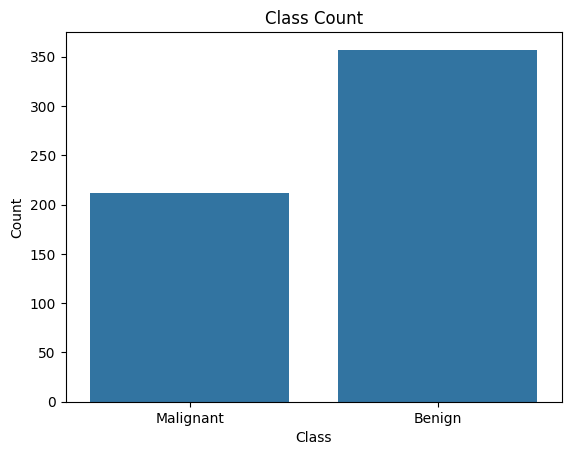

In [10]:
sns.countplot(x=dataset.target)
plt.title('Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

In [11]:
X = dataset.data
y = dataset.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [13]:
# Create model
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)          # f = wx + b

    def forward(self, x):
        # Convert predictions to probabilities
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [ ]:
# Instantiate the model
model = LogisticRegression(n_features)

In [17]:
# Loss and optimizer
learning_rate = 0.02
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
def train_model(X_train, y_train, model, criterion, optimizer, num_epochs = 100):

  # Training loop
  for epoch in range(num_epochs):

      # Forward pass
      y_predicted = model(X_train)
      loss = criterion(y_predicted, y_train)   # Loss

      # Backward pass
      loss.backward()

      # Update Gradients
      optimizer.step()

      # Zero Gradients
      optimizer.zero_grad()

      if (epoch+1) % 10 == 0:

          print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

In [44]:
def evaluate_model(X_test, y_test, model):

  # Set the model to evaluation mode
  model.eval()

  with torch.no_grad():

    y_predicted = model(X_test)  # Get predicted labels as probabilities
    y_predicted_cls = (y_predicted > 0.5).int()  # Round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # Compute Accuracy
    print(f'Accuracy = {acc:.4f}')

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_predicted_cls)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

    disp.plot(cmap='Blues')
    plt.show()

In [45]:
train_model(X_train, y_train, model, criterion, optimizer)

epoch: 10, loss = 0.1208
epoch: 20, loss = 0.1197
epoch: 30, loss = 0.1188
epoch: 40, loss = 0.1178
epoch: 50, loss = 0.1169
epoch: 60, loss = 0.1160
epoch: 70, loss = 0.1152
epoch: 80, loss = 0.1144
epoch: 90, loss = 0.1136
epoch: 100, loss = 0.1129


Accuracy = 0.9912


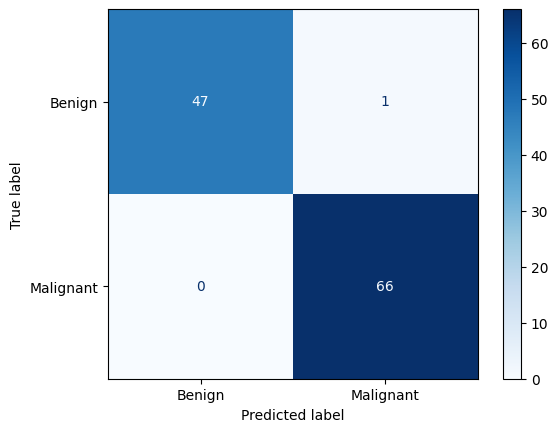

In [46]:
evaluate_model(X_test, y_test, model)